# CSCA 5622: Supervised Learning Final Project  
## Heart Disease Classification  

**Name:** Olaniyi Nafiu  

---

## 📌 Project Description  
This project focuses on performing **Exploratory Data Analysis (EDA)** on heart disease data and building **supervised machine learning models** to diagnose heart disease. Various models and algorithms will be explored to identify the most effective one for this use case.  

### 🏷️ Task: Classification  

---

## 🎯 Goals  
- Deepen my understanding of different machine learning models and their real-world applications.  
- Accurately diagnose heart disease in patients using predictive models.  

---

## 📊 Dataset  
- The dataset originates from research conducted in the **1980s** and is maintained in the **UCI Machine Learning Repository**.  
- This project specifically explores the **Cleveland dataset** from the Heart Disease dataset collection.  
- **Source:** [UCI ML Repository - Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)  

> *Citation (APA format):*  
Dua, D., & Graff, C. (2019). *UCI Machine Learning Repository*. University of California, Irvine, School of Information and Computer Sciences.  

---

## 🔍 Data Description  
- **Number of features:** 13 (Feature descriptions will be provided after data import.)  
- **Target variable:** `"num"`  
  - **0** → No heart disease  
  - **1, 2, 3, 4** → Presence of heart disease (various severity levels)  
- **Number of samples:** 303  
- **Source consistency:** All data originates from the cited repository.  

---

In [18]:
# All Imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve

In [19]:
## Load data set
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

In [20]:
# Feature Descriptions
print("Feature Description:")
print(heart_disease.variables)
print("\n" + "="*50 + "\n")

# Statistical Summary of Features
print("Feature Statistical Summary:")
print(X.describe())
print("\n" + "="*50 + "\n")

# Data Summary of Features
print("Feature Data Summary:")
print(X.info())
print("\n" + "="*50 + "\n")

# Statistical Summary of Target Variable
print("Target Statistical Summary:")
print(y.describe())
print("\n" + "="*50 + "\n")

# Data Summary of Target Variable
print("Target Data Summary:")
print(y.info())


Feature Description:
        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None            

In [21]:
# Data Cleaning

# Combine Features and Target
print("Visualizing Data Before Cleaning...\n" + "-"*50)
df = pd.concat([X, y], axis=1)  # Combine X (features) and y (target)
df.info()

# Remove Rows with Null Values in 'ca' and 'thal'
print("\n" + "="*50 + "\n")
print("Removing Null Rows in (Columns: 'ca' and 'thal')...\n" + "-"*50)
df_cleaned = df.dropna(subset=['ca', 'thal'])

# Given that we only intend to classify whether heart disease exists or not, 
# merge values 1, 2, 3, 4 (indicating presence) into 1, and 0 (indicating absence) into -1
df_cleaned.loc[:, 'num'] = df_cleaned['num'].replace({0: -1, 1: 1, 2: 1, 3: 1, 4: 1})

# Check the changes
print("Updated 'num' value counts:")
print(df_cleaned['num'].value_counts())

# Visualize Data After Cleaning
print("\n" + "="*50 + "\n")
print("Visualizing Data After Cleaning...\n" + "-"*50)
df_cleaned.info()

# Summary:
print("\n" + "="*50 + "\n")
print("Data Cleaning Summary:")
print(f"- Original dataset shape: {df.shape}")
print(f"- Cleaned dataset shape: {df_cleaned.shape}")
print(f"- Rows removed: {df.shape[0] - df_cleaned.shape[0]}")
print(f"- Changes made to 'num' column:")
print(f"  - 0 replaced with -1 (absence of heart disease)")
print(f"  - 1,2,3,4 replaced with 1 (presence of heart disease)")
print("- Now all columns contribute equally to the model.")

df = df_cleaned

Visualizing Data Before Cleaning...
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Removing Null Rows in (Columns: 'ca' and 'thal')...
--------------------------------------------------
Updated 'num' value counts:

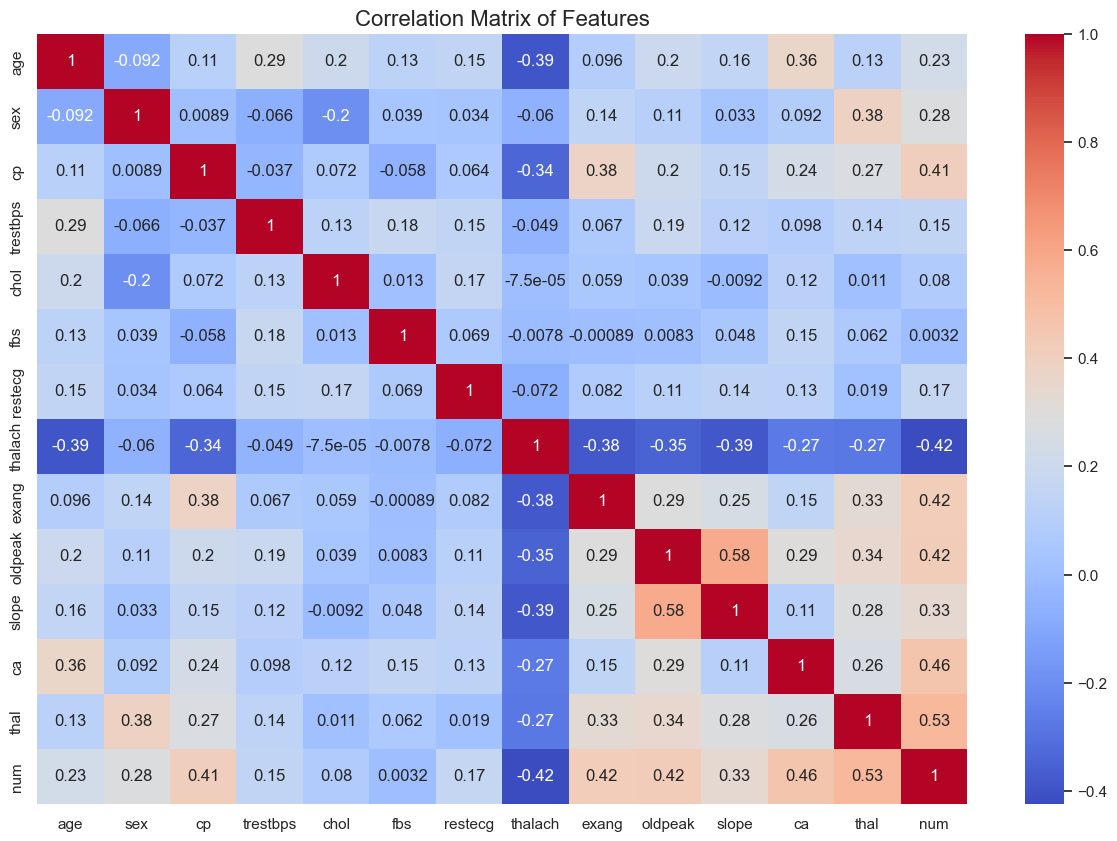


               Pairplot of Features               


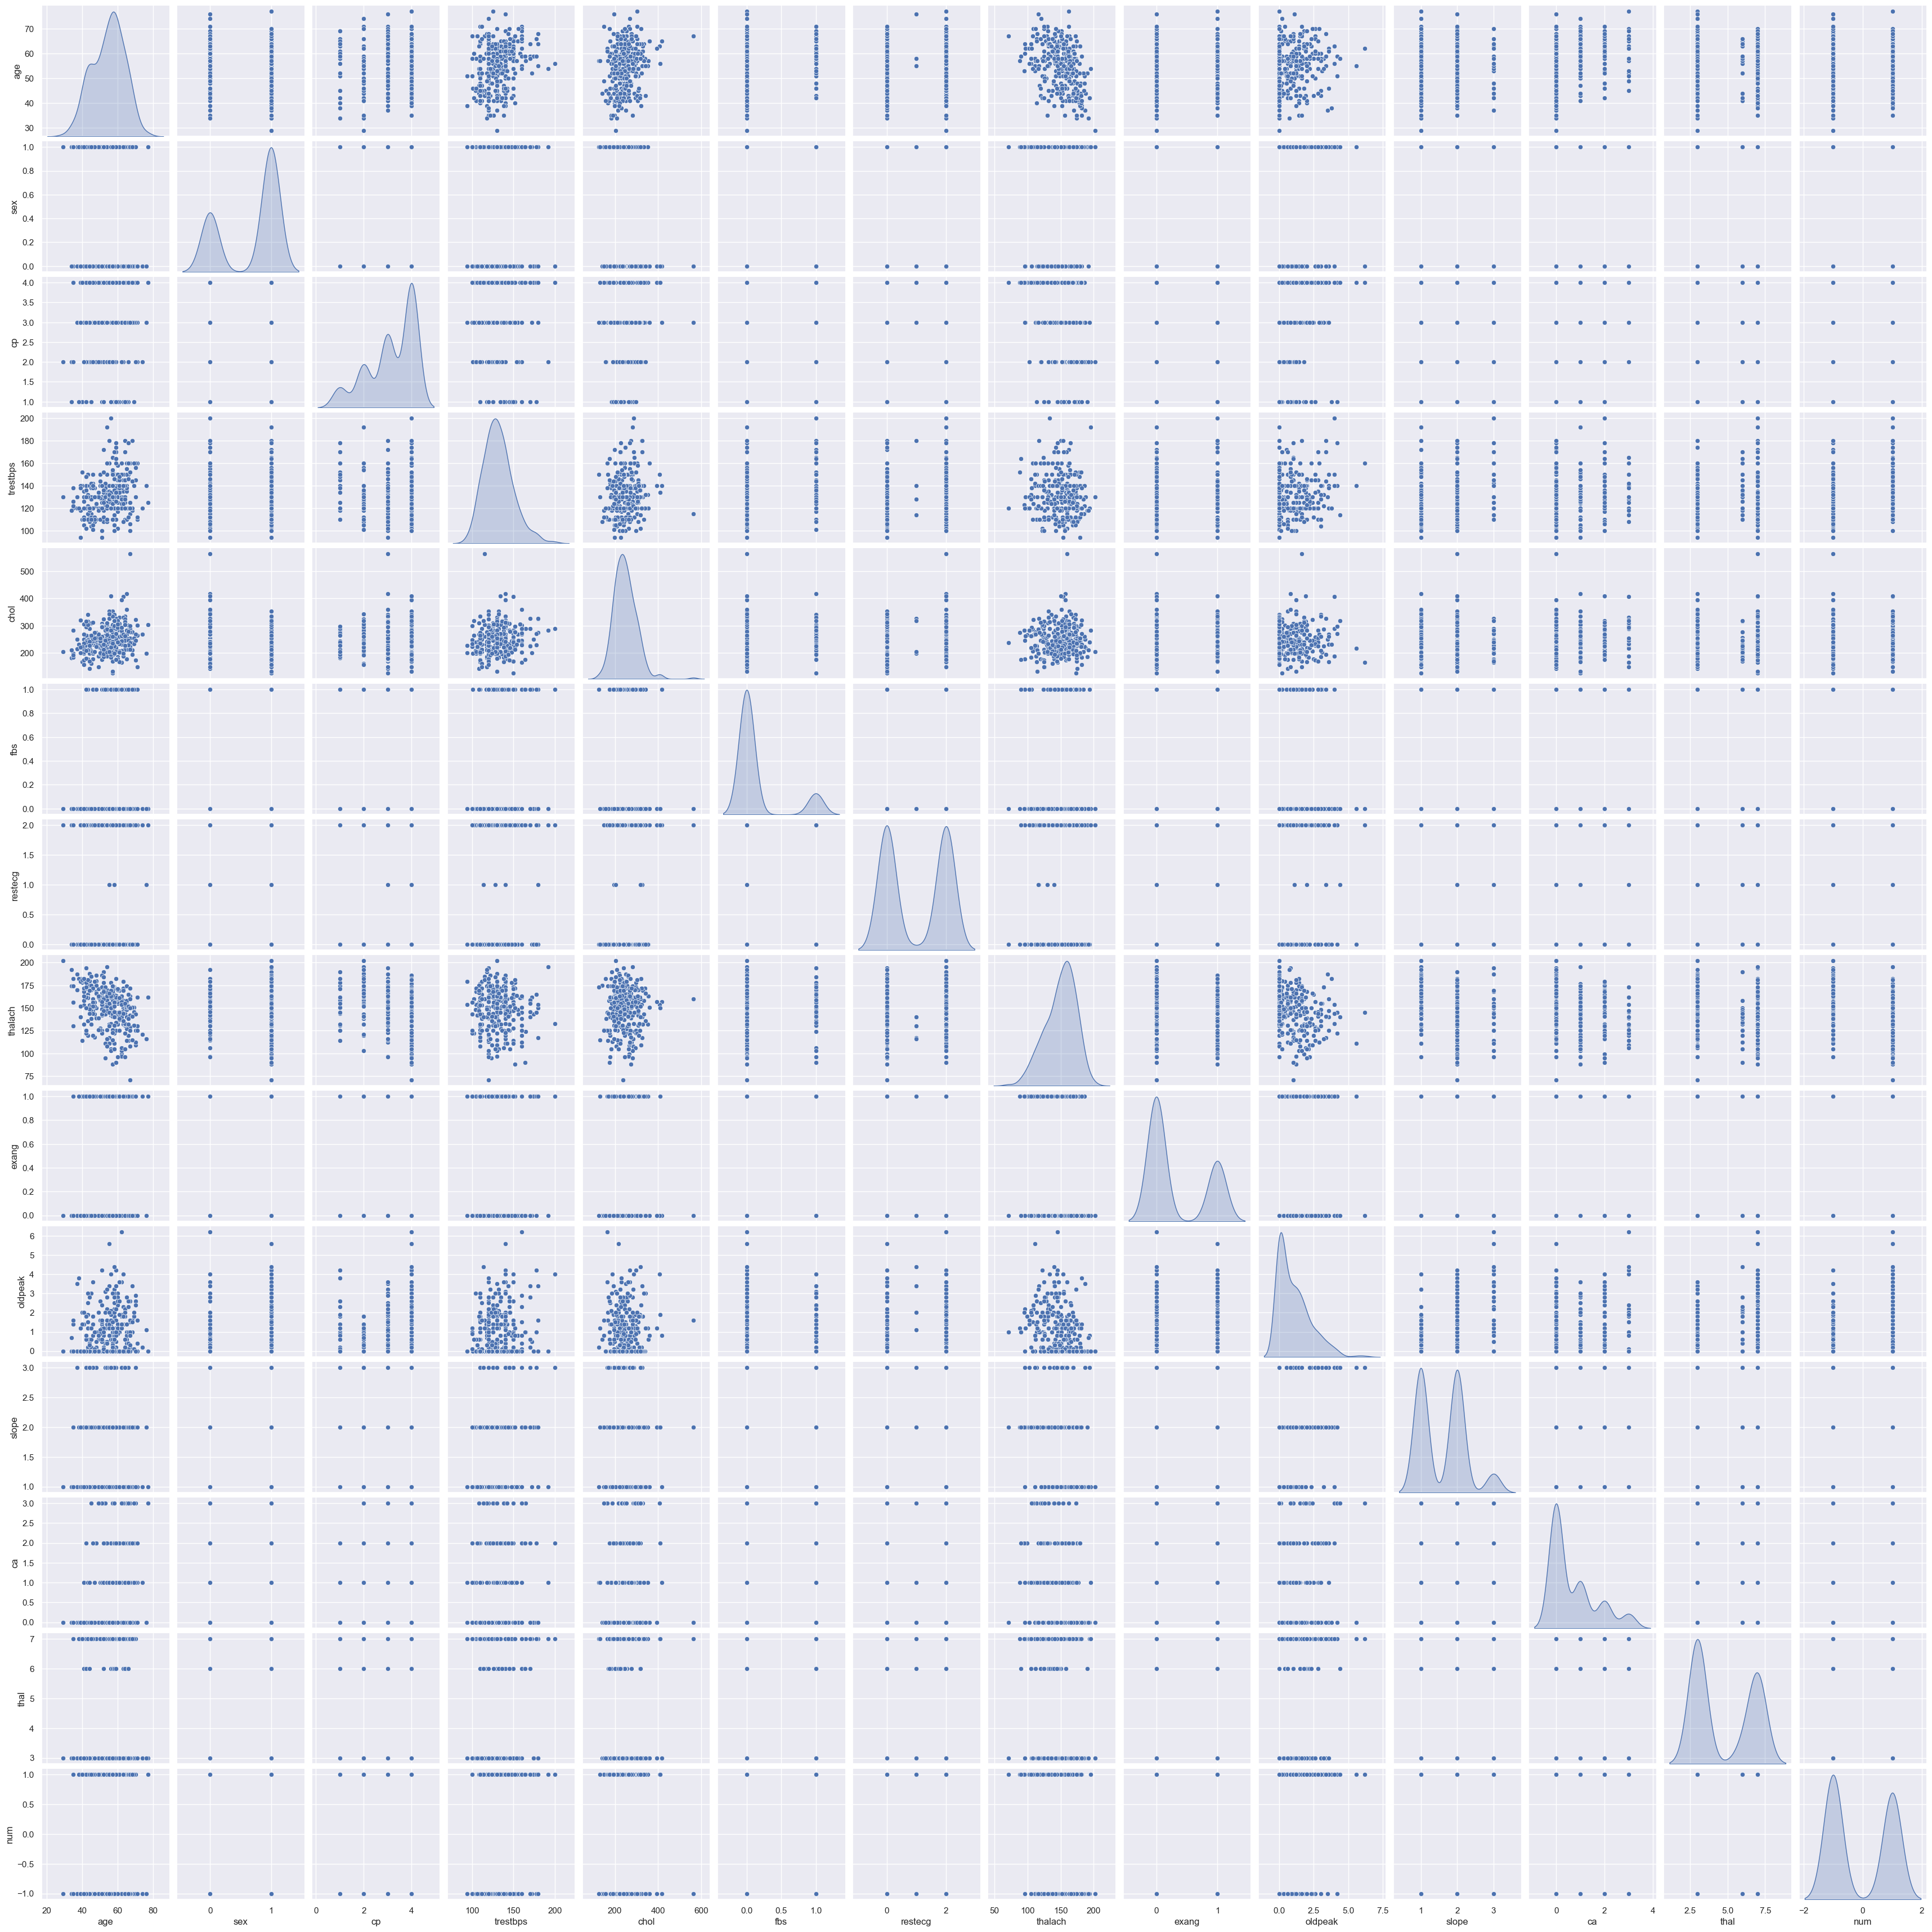

In [26]:
# Exploratory Data Analysis

# Create and analyse correlation matix
plt.figure(figsize=(15, 10))  # Adjust width and height as needed
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features", fontsize=16)  # Add title
plt.show()


# Create and analyse pairplot
print("\n\033[1m{:^50}\033[0m".format("Pairplot of Features"))
sns.pairplot(df, diag_kind="kde")
plt.show()
# Conclusions from correlation matrix and pairplot
# 1. There is no evidence of strong correlation between individual features (||x|| < 0.58). 
#    No feature can be removed as unsignificant based on current information
# 2. There is no evidence of strong correlation between individual features and target (||x|| < 0.51).
#    Multiple features will be needed in the model to accurately predict that target

In [27]:
# Split training and test data

class heart_data:
    """
    class to import the breast cancer dataset from sklearn
    
    """
    def __init__(self):
        
        X = df.drop(columns=['num'])  # Drop the target column from the features
        y = df['num']
        self.x_train = None 
        self.x_test = None 
        self.y_train = None 
        self.y_test = None
        
        # TODO: Split the data into training (75%) and test data (25%)     
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.25, random_state=42
        )
data = heart_data()

# To effectively predict heart disease, the models will be tuned to optimize recall.
# This metric is crucial in this context because it focuses on reducing false negatives, which could have serious consequences for patient health.


Results and Analysis Summary:
Best Parameters: {'C': 10}
Best Cross-Validation Recall Score: 0.7795
Test Score (Accuracy): 0.8933
Final Test Recall: 0.9091
Final Test Precision: 0.8571
Final Test F1-score: 0.8824
Area Under the Curve (AUC): 0.942


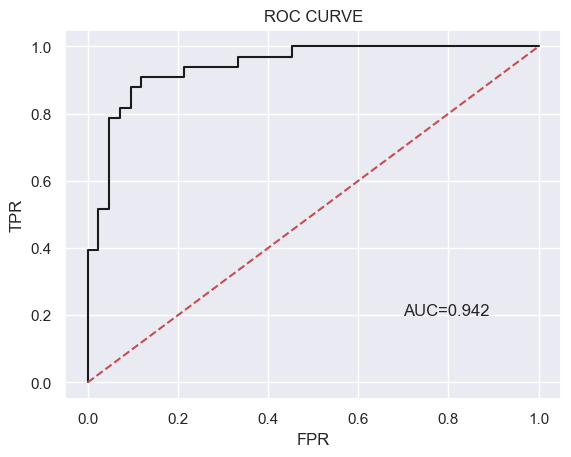

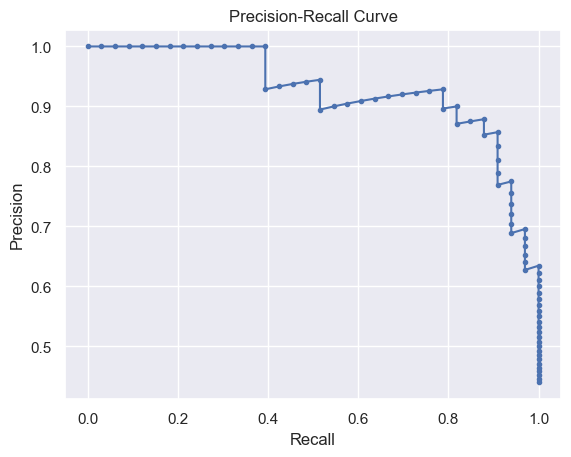

In [28]:
# Model 1: Logical Regression

# Define model
LogReg = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Define hyperparameter grid (C controls regularization strength)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation, optimizing for recall
grid_search = GridSearchCV(LogReg, param_grid, scoring='recall', cv=5)
grid_search.fit(data.x_train, data.y_train)

# Retrieve the best model
best_LogReg = grid_search.best_estimator_

# Results and Analyses
print("\nResults and Analysis Summary:")

# Display best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Recall Score: {grid_search.best_score_:.4f}")

# Display model performance statistics
y_pred_best = best_LogReg.predict(data.x_test)
test_accuracy = accuracy_score(data.y_test, y_pred_best)
final_test_recall = recall_score(data.y_test, y_pred_best)
final_test_precision = precision_score(data.y_test, y_pred_best)
final_test_f1 = f1_score(data.y_test, y_pred_best)
print(f"Test Score (Accuracy): {test_accuracy:.4f}")
print(f"Final Test Recall: {final_test_recall:.4f}")
print(f"Final Test Precision: {final_test_precision:.4f}")
print(f"Final Test F1-score: {final_test_f1:.4f}")

# ROC CURVE
y_pred_proba = best_LogReg.predict_proba(data.x_test)[:,1]
fpr, tpr, th = roc_curve(data.y_test, y_pred_proba)
auc = roc_auc_score(data.y_test, y_pred_proba)
print(f"Area Under the Curve (AUC): {auc:.3f}")
plt.plot(fpr, tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7, 0.2, 'AUC='+"{:.3f}".format(auc))
plt.show()

# Precision-Recall Curve
# The Precision-Recall Tradeoff helps you understand the balance between precision and recall.
precision, recall, thresholds = precision_recall_curve(data.y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Logical Regression: Results and Analysis Summary

### Best Model Hyperparameters:
- **C (Regularization Strength):** 10
- **Best Cross-Validation Recall Score:** 0.7795

### Final Model Performance on Test Data
- **Test Accuracy:** 0.8933
- **Final Test Recall (Sensitivity/TPR):** 0.9091  
- **Final Test Precision (PPV):** 0.8571  
- **Final Test F1-score:** 0.8824  
- **Area Under the Curve (AUC):** 0.942  

---

## Conclusion
- The **Logistic Regression model** optimized for recall successfully achieves a **high recall of 90.91%**, meaning it correctly identifies **most positive cases**. This is **crucial for applications like heart disease detection**, where missing a positive case can be **dangerous**.
- **Precision is 85.71%**, meaning some false positives are present, but this is an acceptable tradeoff in this scenario.
- The **F1-score of 88.24%** confirms a good balance between precision and recall.
- **AUC = 0.942**, indicating a **strong discriminative ability** between positive and negative cases.


Results and Analysis Summary:
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 4, 'n_estimators': 12}
Best Cross-Validation Recall Score: 0.8371
Test Score (Accuracy): 0.8667
Final Test Recall: 0.8485
Final Test Precision: 0.8485
Final Test F1-score: 0.8485
Area Under the Curve (AUC): 0.939


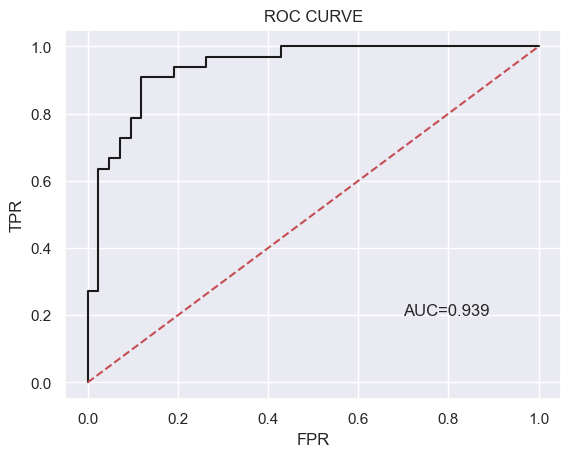

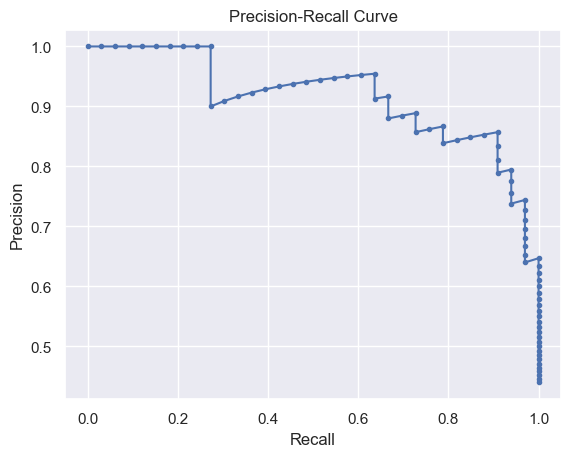

In [29]:
# Model 2: Random Forest

# Initialize the Random Forest Classifier with class weights
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Hyperparameter Tuning
# Set up parameter grid to search for the best Random Forest hyperparameters
param_grid = {
    'n_estimators': range(1, 50),
    'min_samples_leaf': [1, 2, 4, 6],
    'max_depth': [None, 2, 4, 6]
}

# Perform grid search with cross-validation to find the best parameters based on recall
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall')
grid_search.fit(data.x_train, data.y_train)

# Retrieve the best model
best_rf_model = grid_search.best_estimator_

# Results and Analyses:
print("\nResults and Analysis Summary:")

# Display best hyperparameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Recall Score: {grid_search.best_score_:.4f}")

# Display model performance statistics
y_pred_best = best_rf_model.predict(data.x_test)
test_accuracy = accuracy_score(data.y_test, y_pred_best)
final_test_recall = recall_score(data.y_test, y_pred_best)
final_test_precision = precision_score(data.y_test, y_pred_best)
final_test_f1 = f1_score(data.y_test, y_pred_best)
print(f"Test Score (Accuracy): {test_accuracy:.4f}")
print(f"Final Test Recall: {final_test_recall:.4f}")
print(f"Final Test Precision: {final_test_precision:.4f}")
print(f"Final Test F1-score: {final_test_f1:.4f}")

# ROC CURVE
y_pred_proba = best_rf_model.predict_proba(data.x_test)[:, 1]
fpr, tpr, th = roc_curve(data.y_test, y_pred_proba)
auc = roc_auc_score(data.y_test, y_pred_proba)
print(f"Area Under the Curve (AUC): {auc:.3f}")
plt.plot(fpr, tpr, 'k-')
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1), 'r--')
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.text(0.7, 0.2, 'AUC='+"{:.3f}".format(auc))
plt.show()

# Precision-Recall Curve
# The Precision-Recall Tradeoff helps you understand the balance between precision and recall.
precision, recall, thresholds = precision_recall_curve(data.y_test, y_pred_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# Random Forest: Results and Analysis Summary

### Best Model Hyperparameters:
- **max_depth:** 4
- **min_samples_leaf:** 4
- **n_estimators:** 12
- **Best Cross-Validation Recall Score:** 0.8371

### Final Model Performance on Test Data
- **Test Accuracy:** 0.8667
- **Final Test Recall (Sensitivity/TPR):** 0.8485  
- **Final Test Precision (PPV):** 0.8485  
- **Final Test F1-score:** 0.8485  
- **Area Under the Curve (AUC):** 0.939  

---

## Conclusion
- The **Random Forest model** optimized for recall achieves a **recall of 84.85%**, indicating it **correctly identifies most positive cases**.
- **Precision** is also **84.85%**, ensuring a **good balance** between false positives and true positives, which is critical for applications like heart disease detection.
- The **F1-score of 84.85%** shows that the model balances **precision and recall effectively**, offering a well-rounded performance.
- **AUC = 0.939** signifies a **strong ability** to differentiate between positive and negative cases.

# Model Comparison: Discussion and Conclusion

### 1. **Performance Overview**

- **Logistic Regression:**
  - **Recall:** 90.91%, **Precision:** 85.71%, **F1-score:** 88.24%, **AUC:** 0.942
  - Higher **test accuracy** (89.33%) and **recall** compared to **Random Forest**, making it better at identifying true positives.

- **Random Forest:**
  - **Recall:** 84.85%, **Precision:** 84.85%, **F1-score:** 84.85%, **AUC:** 0.939
  - Slightly lower recall but well-balanced **precision** and **recall** compared to **Logistic Regression**.

### 2. **Key Insights**
- **Logistic Regression** performs better in **recall** (critical for detecting heart disease), and slightly outperforms **Random Forest** in **F1-score** and **test accuracy**.
- **Random Forest** achieves a more balanced **precision** and **recall**, making it a strong contender despite slightly lower performance in recall.

### 3. **Conclusion**
- **Logistic Regression** is preferred for applications prioritizing **recall**, such as medical diagnoses, where minimizing false negatives is crucial.
- **Random Forest** can be considered for more balanced performance between **precision** and **recall**. Further tuning could improve its performance.
